![](https://i.ibb.co/3vF9yD8/Screenshot-from-2019-05-29-21-23-47.png)

**MNIST ("Modified National Institute of Standards and Technology")** is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.


Using CNN Keras and Tensorflow DNN


In [1]:
from google.colab import files
files.upload()
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
kaggle.json


In [2]:
!kaggle competitions download -c digit-recognizer -p /content/drive/My\Drive/kaggle/digit-recognizer

  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 31.6MB/s]
  0% 0.00/6.09M [00:00<?, ?B/s]
100% 6.09M/6.09M [00:00<00:00, 56.0MB/s]
 65% 6.00M/9.16M [00:00<00:00, 59.1MB/s]
100% 9.16M/9.16M [00:00<00:00, 58.6MB/s]


In [3]:
%%capture
! pip3 install --upgrade tensorflow 

In [4]:
import pandas as pd
import numpy as np


from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D, BatchNormalization, Dropout
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set_style ('darkgrid')
%matplotlib inline
np.random.seed(42)

In [5]:
train = (pd.read_csv
         ('/content/drive/MyDrive/kaggle/digit-recognizer/train.csv.zip')
)

In [6]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
test = pd.read_csv('/content/drive/MyDrive/kaggle/digit-recognizer/test.csv.zip')

In [8]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
features = train.drop('label', axis=1)

In [10]:
target = train['label']

In [11]:
X_ = np.array(features)

In [12]:
X_test = np.array(test)

In [13]:
X_train = X_.reshape(X_.shape[0], 28, 28)

In [14]:
X_train.shape

(42000, 28, 28)

Let us take a look to out objects

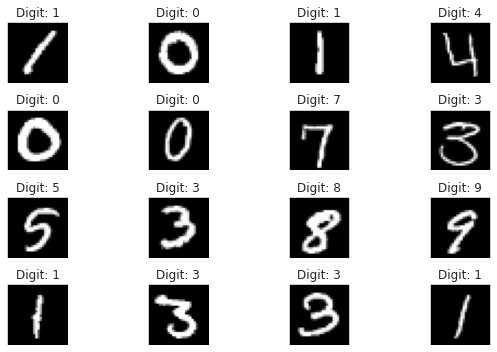

In [15]:
fig = plt.figure(figsize=(10,5))

for i in range(16):
    fig.add_subplot(4, 4, i+1)
    
    plt.imshow(X_train[i], cmap='gray')
    
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.title('Digit: ' + str(target[i]))


Now we have to check the count of values for our output layer

In [16]:
target.value_counts(normalize=True)

1    0.111524
7    0.104786
3    0.103595
9    0.099714
2    0.099452
6    0.098500
0    0.098381
4    0.096952
8    0.096738
5    0.090357
Name: label, dtype: float64

In [17]:
len(target.value_counts())

10

## CNN


We have to reshape our data

In [18]:
X_train = X_.reshape(X_.shape[0], 28, 28, 1)
X_test_reshape = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, target, test_size=0.25, 
                                            random_state=42)

In [19]:
model = Sequential()


model.add(Conv2D(filters = 64, 
                 kernel_size = (5,5), 
                 padding = 'same', 
                 activation ='elu', 
                 input_shape = (28,28,1)))

model.add(BatchNormalization())

model.add(Conv2D(filters = 64, 
                 kernel_size = (5,5), 
                 padding = 'same', 
                 activation ='elu'))

model.add(BatchNormalization())

model.add(AvgPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, 
                 kernel_size = (3,3), 
                 padding = 'same', 
                 activation ='elu'))

model.add(BatchNormalization())

model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, 
                 kernel_size = (3,3), 
                 padding = 'same',  
                 activation ='elu'))

model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256, activation = "elu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation = "elu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation = "softmax"))


model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', 
              metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        1664      
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        3

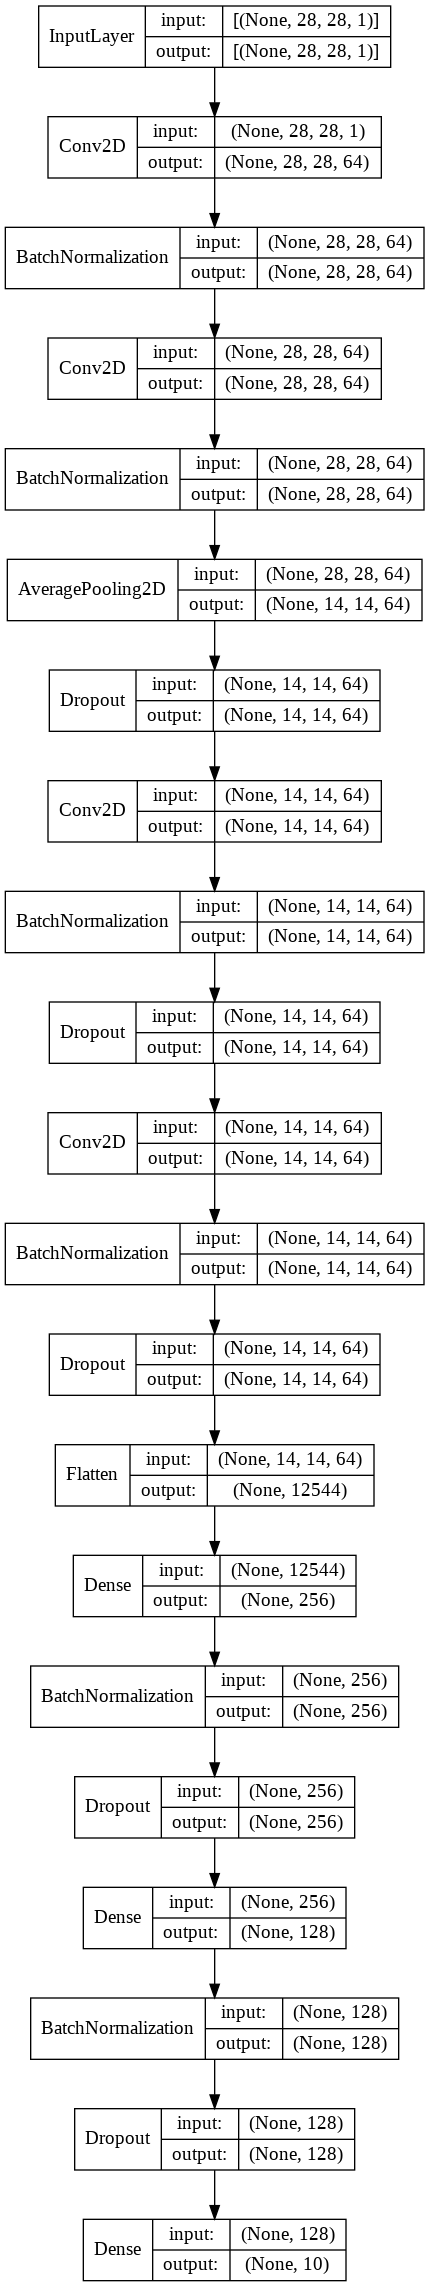

In [21]:
plot_model(model, show_shapes=True, show_layer_names=False)

In [22]:
early_stopping = EarlyStopping(
    min_delta=0.0002,
    mode='min', 
    patience=8,
    restore_best_weights=True,
)

Train on 31500 samples, validate on 10500 samples
Epoch 1/42
31500/31500 [==============================] - 101s 3ms/sample - loss: 0.1947 - acc: 0.9419 - val_loss: 0.0686 - val_acc: 0.9795
Epoch 2/42
31500/31500 [==============================] - 70s 2ms/sample - loss: 0.0891 - acc: 0.9744 - val_loss: 0.0372 - val_acc: 0.9888
Epoch 3/42
31500/31500 [==============================] - 72s 2ms/sample - loss: 0.0700 - acc: 0.9806 - val_loss: 0.0552 - val_acc: 0.9849
Epoch 4/42
31500/31500 [==============================] - 72s 2ms/sample - loss: 0.0609 - acc: 0.9829 - val_loss: 0.0344 - val_acc: 0.9905
Epoch 5/42
31500/31500 [==============================] - 72s 2ms/sample - loss: 0.0533 - acc: 0.9850 - val_loss: 0.0340 - val_acc: 0.9902
Epoch 6/42
31500/31500 [==============================] - 72s 2ms/sample - loss: 0.0494 - acc: 0.9859 - val_loss: 0.0266 - val_acc: 0.9933
Epoch 7/42
31500/31500 [==============================] - 71s 2ms/sample - loss: 0.0474 - acc: 0.9874 - val_loss: 0

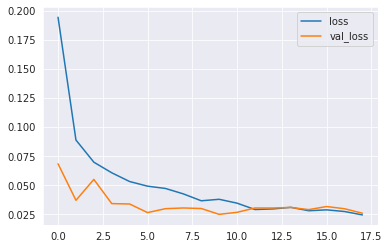

In [27]:
history = model.fit(X_tr, y_tr, 
          validation_data=(X_val, y_val),
          verbose=1, epochs=42, batch_size=16,
          callbacks=[early_stopping])

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

In [28]:
X_test_reshape.shape

(28000, 28, 28, 1)

In [29]:
preds = np.argmax(model.predict(X_test_reshape), axis=1)

In [30]:
submission = pd.read_csv('/content/drive/MyDrive/kaggle/digit-recognizer/sample_submission.csv')

In [31]:
submission.shape

(28000, 2)

In [32]:
submission['Label'] = preds
submission.to_csv('my_submission_keras.csv',index=False)
# files.download("my_submission_keras.csv")

submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


**We have achived 0.99225 on Test here**

## TensorFlow

Let us try to do it via only Tensorflow. Just for practice.  

Thanks to my favourite book: Hands-On Machine Learning with Scikit-Learn and TensorFlow - I love this book

We indicate the number of neurons in layers, inputs and outputs

In [33]:
tf.reset_default_graph()

In [34]:
INPUTS = 28 * 28 # MNIST size

HIDDEN_1 = 300
HIDDEN_2 = 100
OUTPUTS = 10

Create placeholder nodes

In [35]:
X = tf.placeholder(tf.float32, shape=(None, INPUTS), name='X')
y = tf.placeholder(tf.int32, shape=(None), name='y')

Now it's the turn of the function that creates the layers

Now we can create layers

In [36]:
with tf.name_scope('DNN'):
  hidden1 = tf.layers.dense(X, HIDDEN_1, name='hidden_1', 
                    activation = tf.nn.leaky_relu)
  hidden2 = tf.layers.dense(hidden1, HIDDEN_2, name='hidden_2', 
                    activation = tf.nn.leaky_relu)
  logits = tf.layers.dense(hidden2, OUTPUTS, name='outputs')

logits - output of neurons before passing through softmax

In [37]:
with tf.name_scope('loss_func'):
  cross_entr = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, 
                                                              logits=logits)
  loss = tf.reduce_mean(tf.cast(cross_entr, tf.float32))

In [38]:
with tf.name_scope('train'):
  optimizer = tf.train.RMSPropOptimizer(learning_rate=0.01)
  training = optimizer.minimize(loss)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [39]:
with tf.name_scope('eval'):
  valid = tf.nn.in_top_k(logits, y, 1)
  accuracy_score = tf.reduce_mean(tf.cast(valid, tf.float32))

Training (with GPU) (let us use only 5 epochs to compute result faster)

In [49]:
epochs = 5
batch_size = 50

In [41]:
X_train = features.to_numpy().astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = test.to_numpy().astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = target.to_numpy().astype(np.int32)
X_train.shape, y_train.shape

((42000, 784), (42000,))

In [42]:
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [43]:
X_valid.shape

(5000, 784)

This func will help us to make batches for training

In [44]:
def shuffle(X, y, batch_size):
    idx = np.random.permutation(len(X))
    rnd_batches = len(X) // batch_size
    for batch_idx in np.array_split(idx, rnd_batches):
        X_batch, y_batch = X[idx], y[idx]
        yield X_batch, y_batch

In [45]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

to make sure we use GPU

In [47]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [51]:
tf.debugging.set_log_device_placement(True)

with tf.Session() as sess:

  init.run()

  for epoch in range(epochs):

      for X_batch, y_batch in shuffle(X_train, y_train, batch_size):
        sess.run(training, feed_dict={X: X_batch, y: y_batch})

      if epoch % 1 == 0:

        acc_train = accuracy_score.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy_score.eval(feed_dict={X: X_valid, y: y_valid})

        print(epoch, 'Accuracy on training', acc_train, 
                     'Accuracy on validation', acc_valid)

  save_path = saver.save(sess, './model.ckpt')

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7

0 Accuracy on training 0.9906486 Accuracy on validation 0.9732
1 Accuracy on training 0.9966216 Accuracy on validation 0.974
2 Accuracy on training 0.9930811 Accuracy on validation 0.9718
3 Accuracy on training 1.0 Accuracy on validation 0.9762
4 Accuracy on training 1.0 Accuracy on validation 0.9762


Restore our model and predict our Test

In [55]:
with tf.Session() as sess:
    saver.restore(sess, './model.ckpt')
    Z = logits.eval(feed_dict={X: X_test})
    y_pred = np.argmax(Z, axis=1)

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7

INFO:tensorflow:Restoring parameters from ./model.ckpt


In [57]:
submission = pd.read_csv('/content/drive/MyDrive/kaggle/digit-recognizer/sample_submission.csv')

In [58]:
submission['Label'] = y_pred
submission.to_csv('my_submission_tensorflow.csv',index=False)
# files.download("my_submission_tensorflow.csv")

submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3


With this model only 0.97371